In [10]:
# Arrays para manipular datos
import numpy as np
import pandas as pd
import sqlite3

# Gráficos
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8)
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)

# Ciencia de datos, machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, recall_score
from sklearn.metrics import precision_score, f1_score, plot_roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree

# Leer/Guardar modelos
import joblib

In [13]:
con = sqlite3.connect("../data/ds_api.sqlite")
data = pd.read_sql_query("SELECT * from desercion", con)
data.head()


,Algún contenido ha sido publicado.,Comentario creado,Curso visto,Entrega creada.,Finalización de actividad de curso actualizada,Formulario de entrega visto.,Ha comenzado el intento,Intento de cuestionario visualizado,Intento del cuestionario revisado,Intento enviado,...,Lista de insignias vista,Envío actualizado.,Usuario matriculado en el curso,Elemento de calificación actualizado,Informe del usuario visualizado,Informe usuario del curso visto,Suscripción activada,Curso actualizado,Elemento de calificación creado,completo
0,4,1,531,1,5,2,1,5,1,1,...,0,0,0,0,0,0,0,0,0,1
1,2,0,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,87,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,104,0,0,0,1,3,2,1,...,0,0,0,0,0,0,0,0,0,1
4,4,0,83,0,0,0,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Separo en features y target
X = data.iloc[:,0:-1]
y = data.iloc[:,-1:]

X.sample(5)

,Algún contenido ha sido publicado.,Comentario creado,Curso visto,Entrega creada.,Finalización de actividad de curso actualizada,Formulario de entrega visto.,Ha comenzado el intento,Intento de cuestionario visualizado,Intento del cuestionario revisado,Intento enviado,...,Informe de resumen de notas visto,Lista de insignias vista,Envío actualizado.,Usuario matriculado en el curso,Elemento de calificación actualizado,Informe del usuario visualizado,Informe usuario del curso visto,Suscripción activada,Curso actualizado,Elemento de calificación creado
90,0,0,193,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,0,0,49,0,0,0,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
67,2,0,252,0,15,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
125,2,0,339,0,0,0,1,3,2,1,...,0,0,0,0,0,0,0,0,0,0
113,0,0,136,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Escalamos los datos
scaler = StandardScaler()
scaler.fit(X)
data_escalada = scaler.transform(X)

X = pd.DataFrame(data_escalada, index=X.index, columns=X.columns)
X.sample(15)

,Algún contenido ha sido publicado.,Comentario creado,Curso visto,Entrega creada.,Finalización de actividad de curso actualizada,Formulario de entrega visto.,Ha comenzado el intento,Intento de cuestionario visualizado,Intento del cuestionario revisado,Intento enviado,...,Informe de resumen de notas visto,Lista de insignias vista,Envío actualizado.,Usuario matriculado en el curso,Elemento de calificación actualizado,Informe del usuario visualizado,Informe usuario del curso visto,Suscripción activada,Curso actualizado,Elemento de calificación creado
95,-0.456778,-0.082479,-0.757109,-0.186989,-0.637522,-0.231666,-0.840303,-0.555958,-0.622472,-0.692990,...,-0.178005,-0.225189,-0.082479,0.0,-0.082479,-0.110959,-0.082479,-0.166667,-0.082479,-0.082479
0,1.233299,12.124356,3.126890,5.347897,0.449497,4.666419,0.863325,0.852976,0.543678,1.171783,...,-0.178005,-0.225189,-0.082479,0.0,-0.082479,-0.110959,-0.082479,-0.166667,-0.082479,-0.082479
142,-0.456778,-0.082479,-0.959823,-0.186989,0.666900,-0.231666,-0.840303,-0.555958,-0.622472,-0.692990,...,-0.178005,-0.225189,-0.082479,0.0,-0.082479,-0.110959,-0.082479,-0.166667,-0.082479,-0.082479
3,0.388261,-0.082479,-0.335464,-0.186989,-0.637522,-0.231666,0.863325,0.289403,1.709828,1.171783,...,-0.178005,-0.225189,-0.082479,0.0,-0.082479,-0.110959,-0.082479,-0.166667,-0.082479,-0.082479
91,-0.456778,-0.082479,0.167266,-0.186989,0.014689,-0.231666,-0.840303,-0.555958,-0.622472,-0.692990,...,-0.178005,-0.225189,-0.082479,0.0,-0.082479,-0.110959,-0.082479,6.000000,-0.082479,-0.082479
21,-0.456778,-0.082479,-0.400333,-0.186989,-0.637522,-0.231666,-0.840303,-0.555958,-0.622472,-0.692990,...,-0.178005,-0.225189,-0.082479,0.0,-0.082479,-0.110959,-0.082479,-0.166667,-0.082479,-0.082479
52,-0.456778,-0.082479,-0.967932,-0.186989,-0.637522,-0.231666,-0.840303,-0.555958,-0.622472,-0.692990,...,-0.178005,-0.225189,-0.082479,0.0,-0.082479,-0.110959,-0.082479,-0.166667,-0.082479,-0.082479
40,-0.456778,-0.082479,0.410523,-0.186989,1.101708,-0.231666,-0.840303,-0.555958,-0.622472,-0.692990,...,-0.178005,-0.225189,-0.082479,0.0,-0.082479,-0.110959,-0.082479,-0.166667,-0.082479,-0.082479
7,0.810780,-0.082479,0.669997,-0.186989,-0.637522,-0.231666,0.863325,0.852976,0.543678,1.171783,...,2.456465,-0.225189,-0.082479,0.0,-0.082479,-0.110959,-0.082479,-0.166667,-0.082479,-0.082479
126,-0.456778,-0.082479,0.280786,-0.186989,-0.637522,-0.231666,0.863325,0.007616,0.543678,1.171783,...,-0.178005,-0.225189,-0.082479,0.0,-0.082479,-0.110959,-0.082479,-0.166667,-0.082479,-0.082479


In [16]:
# Separamos en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=50000)

In [18]:
# Probamos con regresion logistica
lg = LogisticRegression()
modelo_lg = lg.fit(X_train, y_train)
y_pred_test = modelo_lg.predict(X_test)

# matriz de confusión
conf_lg = confusion_matrix(y_test,y_pred_test)

/home/administrador/anaconda3/envs/ds_api/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/home/administrador/anaconda3/envs/ds_api/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


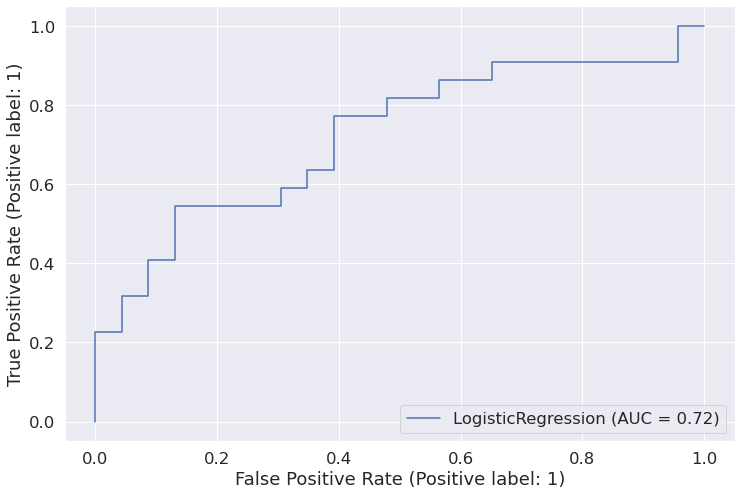

In [19]:
plot_roc_curve(modelo_lg, X_test, y_test);

In [20]:
filename = '../models/modelo_lg.mod'
joblib.dump(modelo_lg, filename)

['../models/modelo_lg.mod']